In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import random

import tsaug
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse

In [216]:
df= pd.read_csv('walk2.csv')
df.head()

,time,Q_I_1,Q_J_1,Q_K_1,Q_R_1,Q_I_2,Q_J_2,Q_K_2,Q_R_2,Q_I_3,Q_J_3,Q_K_3,Q_R_3,Q_I_4,Q_J_4,Q_K_4,Q_R_4,label
0,19:04:38.183867,0.10,-0.14,-0.95,0.28,0.10,-0.05,-0.16,0.98,-0.15,-0.06,0.95,0.26,-0.03,-0.01,-0.09,1.00,walk
1,19:04:39.009071,0.18,-0.11,-0.92,0.32,0.09,0.12,-0.14,0.98,0.09,-0.06,0.98,0.15,-0.07,-0.11,-0.04,0.99,walk
2,19:04:40.133773,0.20,-0.00,-0.91,0.37,0.05,-0.13,-0.05,0.99,-0.01,-0.09,0.99,0.12,-0.09,-0.03,0.01,1.00,walk
3,19:04:41.044543,0.10,-0.12,-0.94,0.32,0.09,-0.06,-0.11,0.99,-0.16,-0.03,0.97,0.18,-0.05,-0.05,-0.06,1.00,walk
4,19:04:42.154170,0.16,-0.08,-0.92,0.35,0.07,0.05,-0.18,0.98,0.09,-0.05,0.97,0.21,-0.09,-0.05,-0.06,0.99,walk


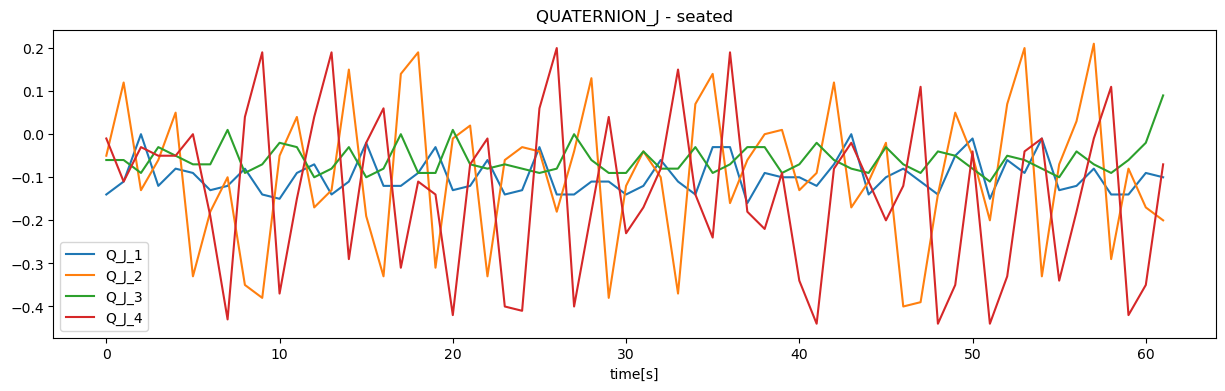

In [217]:
df[['Q_J_1', 'Q_J_2', 'Q_J_3', 'Q_J_4']].plot(figsize=(15,4))
plt.title('QUATERNION_J - seated')
plt.xlabel('time[s]')
plt.show()

In [218]:
dfnovo = df.copy()

Y = dfnovo['Q_I_1'].tolist()
Y = np.array(Y)
Y[:3]

X = np.arange(len(dfnovo['Q_I_1']))

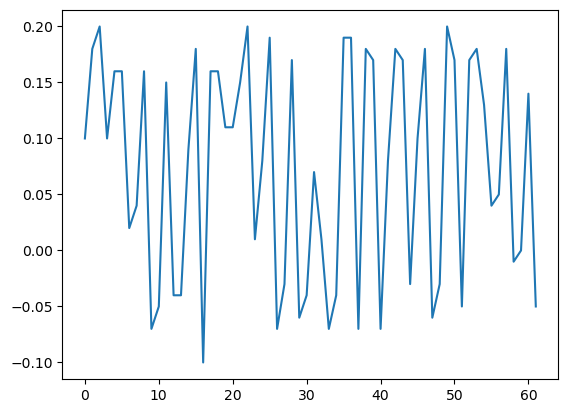

In [219]:
plt.plot(X,Y)
plt.show()

In [220]:
def draw_plot_px2(title_plot, X_aug, Y_aug, label1, X_aug2, Y_aug2, label2):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=X_aug, y=Y_aug,
                        mode='lines',
                        name=label1))
    fig.add_trace(go.Scatter(x=X_aug2, y=Y_aug2,
                        mode='lines',
                        name=label2))
    fig.add_trace(go.Scatter(x=X, y=Y,
                        mode='lines',
                        name='Origin data'))
    fig.update_layout(title=title_plot)
    fig.show()

In [221]:
Y_aug, X_aug = tsaug.AddNoise(scale=0.1).augment(Y, X)
Y_aug2, X_aug2 = tsaug.AddNoise(scale=0.05).augment(Y, X)
draw_plot_px2('Adding Noise', X_aug, Y_aug, 'scale=0.1', X_aug2, Y_aug2,'scale=0.05')

# Convolve
##### Convolve time series with a kernel window.

In [222]:
Y_aug, X_aug = tsaug.Convolve(window="flat", size=10).augment(Y, X)
Y_aug2, X_aug2 = tsaug.Convolve(window="flat", size=5).augment(Y, X)
draw_plot_px2('Adding Convolution', X_aug, Y_aug, 'flat with size=10', X_aug2, Y_aug2, 'flat with size=5')

# Drift
Drift the value of time series.

The augmenter drifts the value of time series from its original values randomly and smoothly. The extent of drifting is controlled by the maximal drift and the number of drift points.

In [223]:
Y_aug, X_aug = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(Y, X)
Y_aug2, X_aug2 = tsaug.Drift(max_drift=0.5, n_drift_points=5).augment(Y, X)
draw_plot_px2('Adding Drift', X_aug, Y_aug, 'max_drift=0.3, n_drift_points=5', 
              X_aug2, Y_aug2, 'max_drift=0.5, n_drift_points=5')

In [224]:
Y_aug, X_aug = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(Y, X)
Y_aug2, X_aug2 = tsaug.Drift(max_drift=0.3, n_drift_points=3).augment(Y, X)
draw_plot_px2('Adding Drift', X_aug, Y_aug, 'max_drift=0.3, n_drift_points=5', 
              X_aug2, Y_aug2, 'max_drift=0.3, n_drift_points=3')

Quantize time series to a level set.

Values in a time series are rounded to the nearest level in the level set.

In [225]:
Y_aug, X_aug = tsaug.Quantize(n_levels=10).augment(Y, X)
Y_aug2, X_aug2 = tsaug.Quantize(n_levels=20).augment(Y, X)
draw_plot_px2('Adding Quantize', X_aug, Y_aug, 'n_levels=10', X_aug2, Y_aug2, 'n_levels=20')